# Quantum Counting

In [1]:
!pip3 install -q qiskit pylatexenc qiskit-aer
from qiskit import QuantumCircuit
from qiskit.circuit.library import QFT
from qiskit import Aer,execute
from qiskit.visualization import plot_histogram

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 24.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 45.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 56.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.5/37.5 MB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.7/112.7 kB 13.3 MB/s eta 0:00:00


This algorithm is implemented for a single solution.

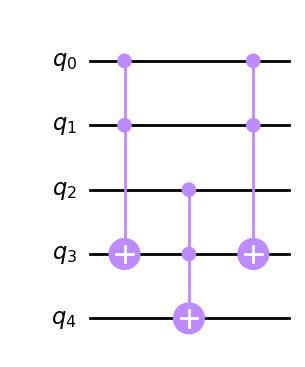

In [2]:
n = 5
qc = QuantumCircuit(n)
qc.ccx(0,1,3)
qc.ccx(2,3,4)
qc.ccx(0,1,3)
qc.draw("mpl")

In [3]:
n = 4
def phase_oracle():
  qc = QuantumCircuit(5)
  qc.ccx(0,1,3)
  qc.ccx(2,3,4)
  qc.ccx(0,1,3)

  return qc

This is the difuser as it will give a negative phase if the three first qubits are negatuve.

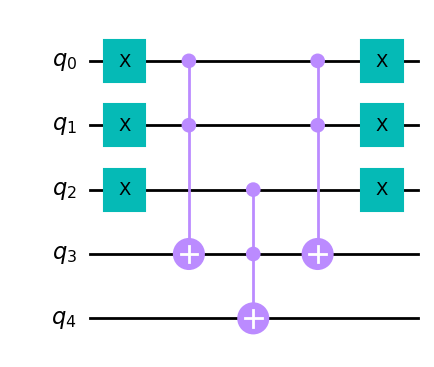

In [4]:
n = 5
qc = QuantumCircuit(n)
for i in range(n-2):
  qc.x(i)
qc.ccx(0,1,3)
qc.ccx(2,3,4)
qc.ccx(0,1,3)
for i in range(n-2):
  qc.x(i)
qc.draw("mpl")

In [5]:
def diffuser(n, name = "V"):
  qc = QuantumCircuit(n, name=name)

  for qb in range(n-2): #first layer of Hadamards in diffuser
    qc.h(qb)

  for i in range(n-2):
    qc.x(i)
  qc.ccx(0,1,3)
  qc.ccx(2,3,4)
  qc.ccx(0,1,3)
  for i in range(n-2):
    qc.x(i)

  for qb in range(n-2): #second layer of Hadamards in diffuser
    qc.h(qb)

  return qc

In [6]:
n = 5
def grover(n):
  qc = QuantumCircuit(n)
  qc.append(phase_oracle(n),range(n))
  qc.append(diffuser(n),range(n))
  return qc

In [7]:
U_gate = phase_oracle().to_gate()
U_gate.label = "Gr Phase"
Con_U = U_gate.control()

In [8]:
V_gate = diffuser(n).to_gate()
V_gate.label = "Diffuser"
Con_V = V_gate.control()

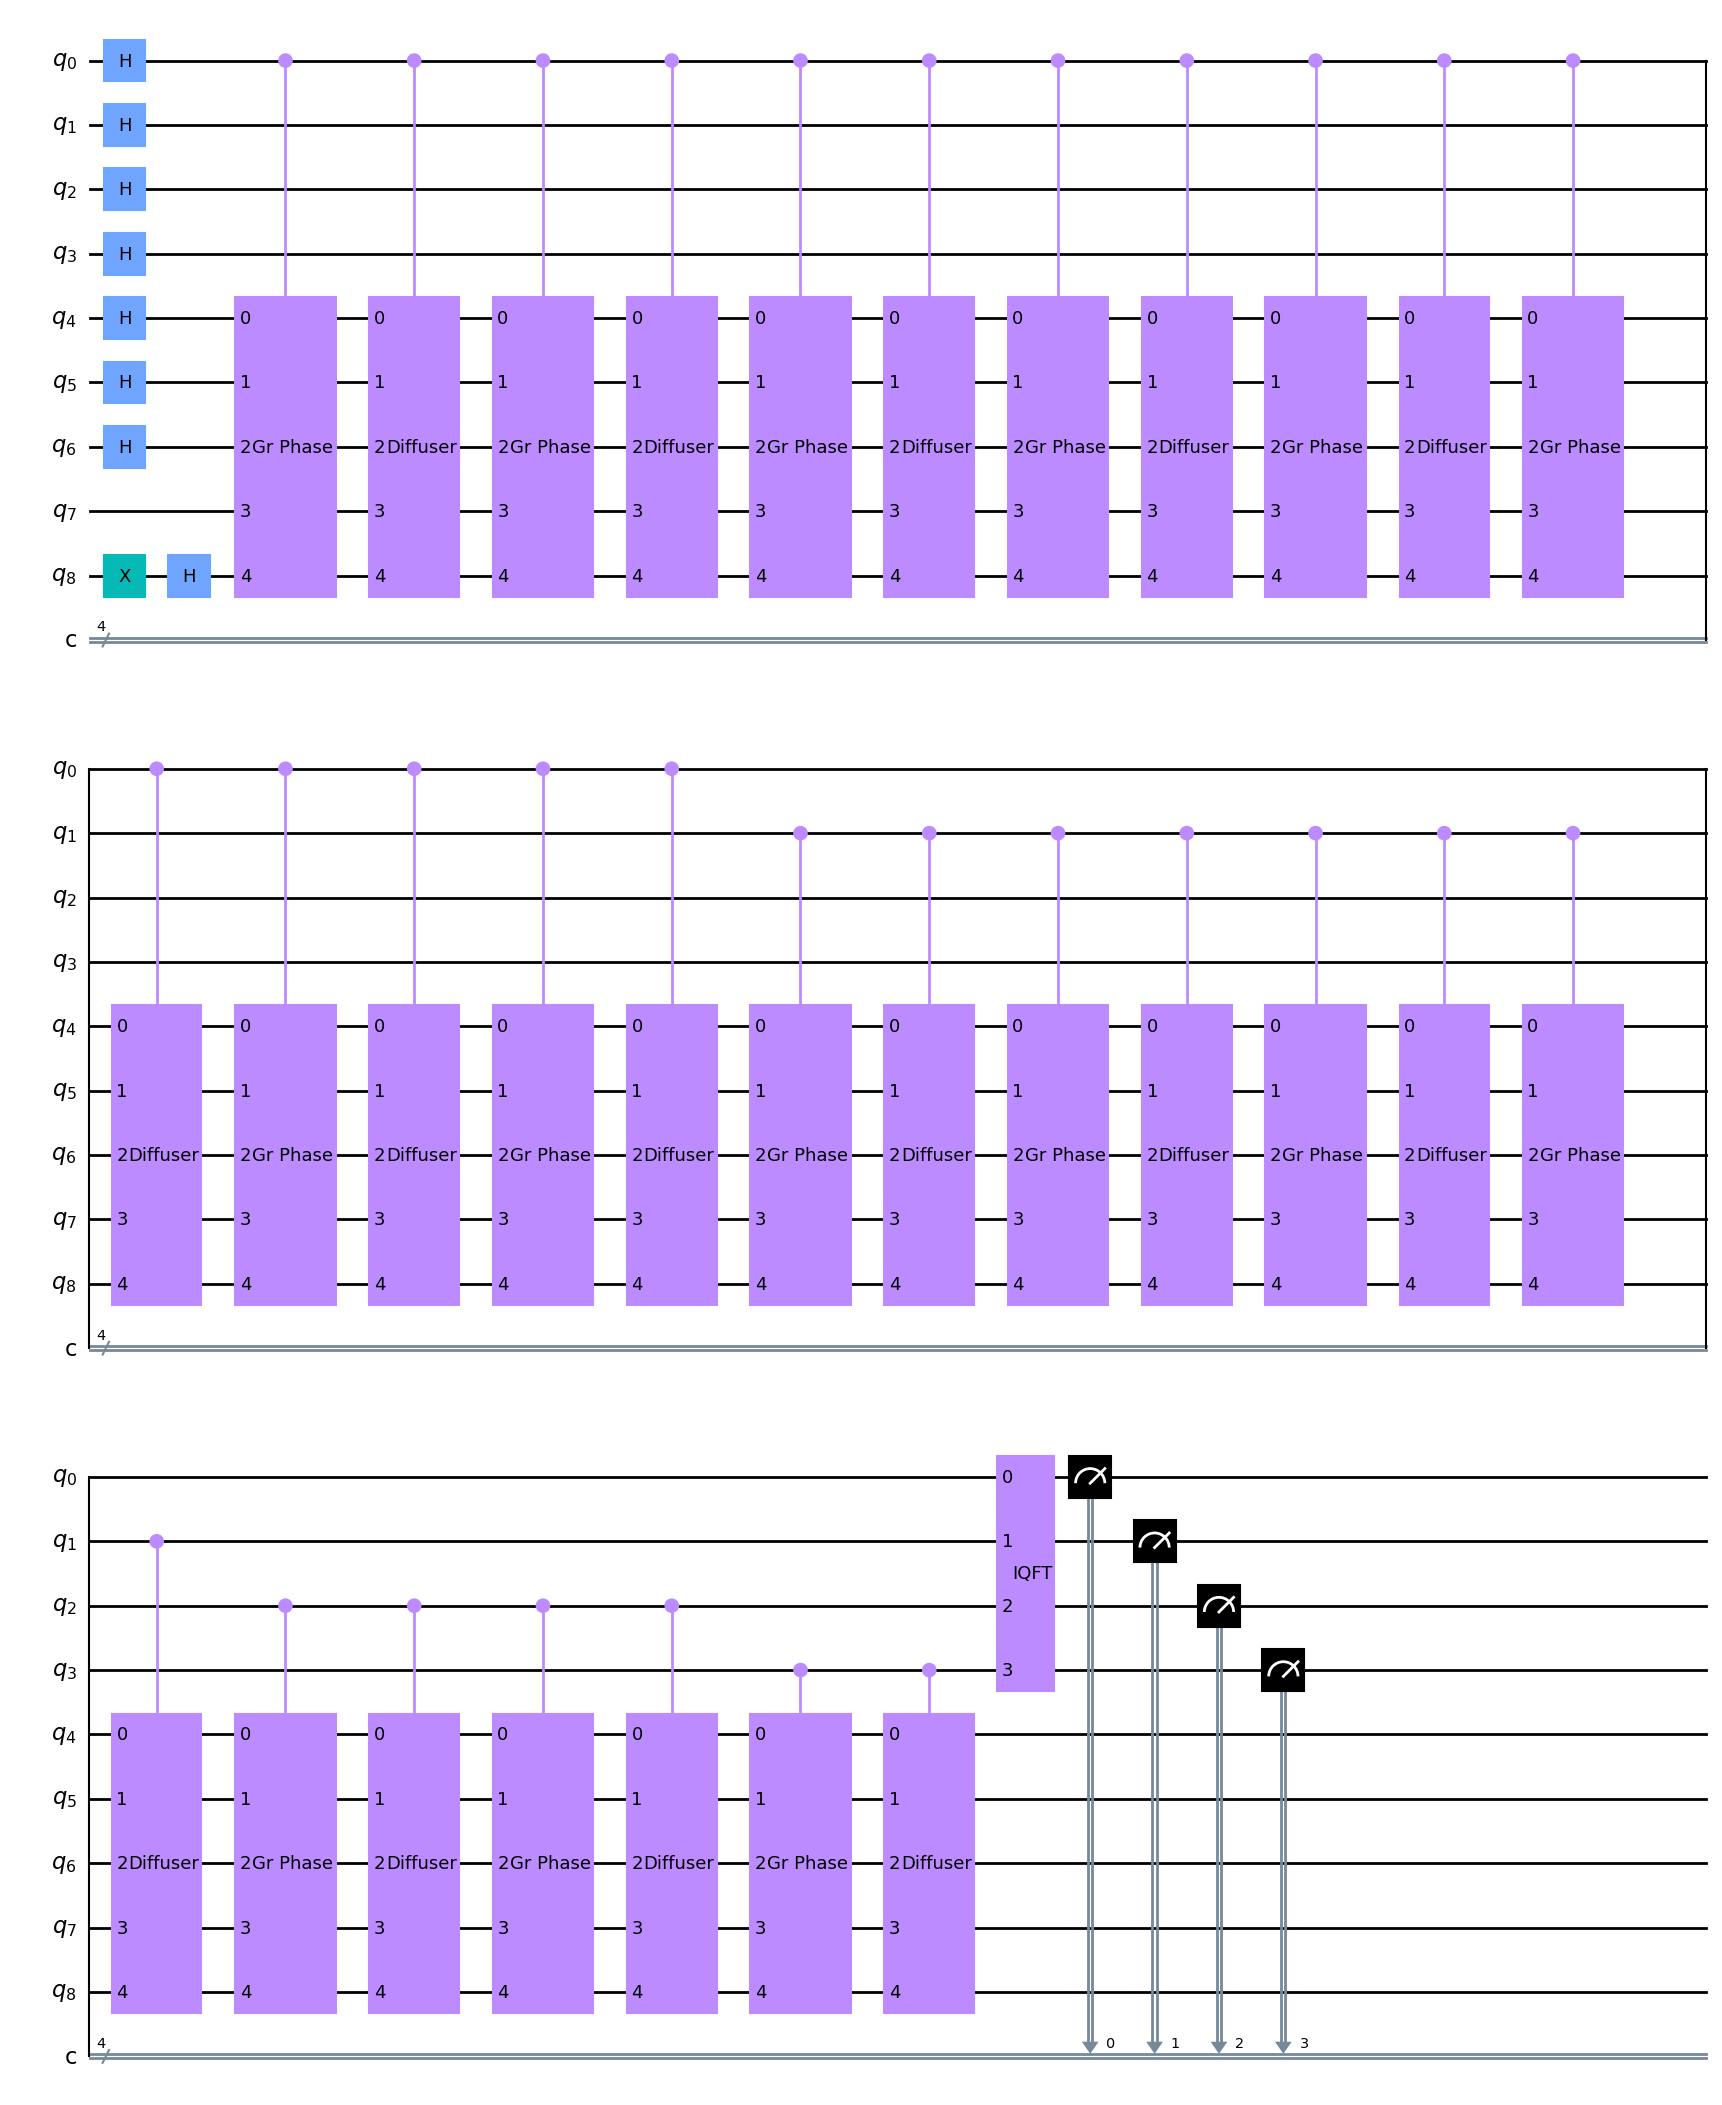

In [13]:
n=5
c=4
qc=QuantumCircuit(n+c,c)

for qubit in range(n+c-2):
    qc.h(qubit)
# put ancilla in state |->
qc.x(n+c-1)
qc.h(n+c-1)

for x in range(c):
        exponent = 2**(c-x-1)
        for j in range(exponent):
            qc.append(Con_U,[x] + list(range(c, n+c)))
            qc.append(Con_V,[x] + list(range(c, n+c)))

qc.append(QFT(c).inverse(), range(c))

for i in range(c):
    qc.measure(i,i)

qc.draw("mpl")

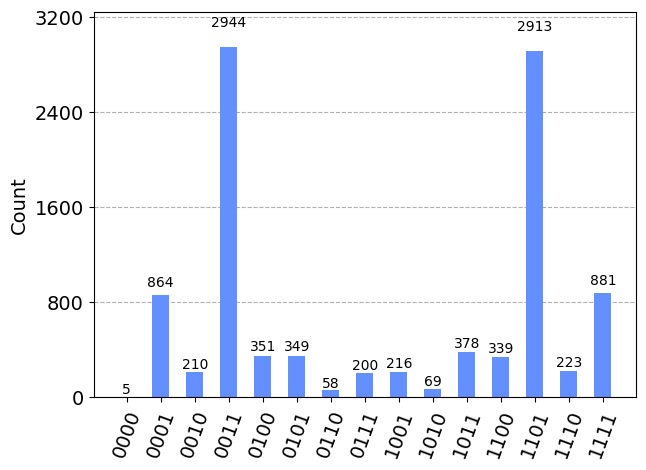

In [14]:
simulation = Aer.get_backend("qasm_simulator")
counts = execute(qc,backend=simulation,shots = 10000).result().get_counts()
plot_histogram(counts)

In [15]:
import operator
highest_probability_string = max(counts.items(), key=operator.itemgetter(1))[0][::-1]
highest_probability_string
measured_int=int(highest_probability_string,2)

In [16]:
import math as mt
N=2**(n-2)
theta=2*mt.pi*measured_int/(2**c)
M=N*(mt.sin(theta/2))**2
print('M = ',M)
print('N = ',N)
print('Number of solutions = ',N-M)

M =  4.000000000000001
N =  8
Number of solutions =  3.999999999999999
